In [2]:
import numpy as np
import sklearn
import statistics
import pandas as pd
import random
import math
from scipy.io import loadmat
import sys
import copy

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### maximum likelihood of possion distribution

In [2]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

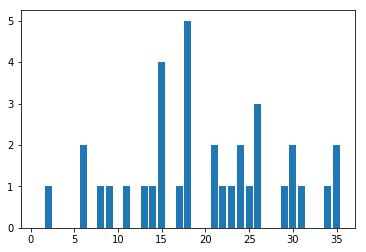

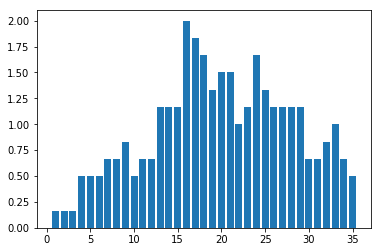

In [3]:
data = "0 1 0 0 0 2 0 1 1 0 1 0 1 1 4 0 1 5 0 0 2 1 1 2 1 3 0 0 1 2 1 0 0 1 2"
data = [int(i) for i in data.split(" ")]
plt.bar(range(1,36), data, )
plt.show()
data_movingaverage = movingaverage(data, 6)
plt.bar(range(1,36), data_movingaverage)
plt.show()

maximum likelihood of possion distribution = mean of the data values

In [4]:
np.array(data).mean()

1.0

### prior knowledge

From her previous experience with him for
the past 600 weeks, she observed that Prof. K has eaten 900 burgers in
total. Based on this prior knowledge, she wants you to come up with a
dfferent estimation that re
ects her prior knowledge.

I know, I know. You didn't learn what's the conjugate prior for Poisson.
If you remember, for example, multinomial distribution has Dirichlet dis-
tribution as its conjugate prior. As for Poisson, we have something called
"Gamma" distribution. The thing is, if you get the gist of the concept
of conjugate prior, especially the notion of "pseudo count", you must be
able to come up with a MAP estimation for this problem easily. You
don't even have to know the Gamma function, no need to bother doing
differentiation

### problem  1 solution

# Incomplete

### problem 2

Load the luddy.jpg file. For this you are allowed to use whatever com-
puter vision toolbox that can read a jpeg file into a variable (for example
the imread command in MATLAB). It must be a 3655 x 6496 x 3 ten-
sor, whose third dimension holds red, green and blue channels respectively.
Let's take the red channel, which will be a matrix of 3655 x 6496 element

In [5]:
img = mpimg.imread('./data/luddy.jpg').astype('float')
img.shape

(3655, 6496, 3)

In [6]:
# select red
img_red = img[:,:,1]
img_red.shape

(3655, 6496)

In [7]:
# select a patch of size 100x100
def random_patch(patch_shape):
    """
    patch_shape(rows, cols);
    remove bottom a rows and right b cols and if dimensions are positive
    select random patches
    """
    
    img_shape = img_red.shape
    max_row_index = img_shape[0] - patch_shape[0]
    max_col_index = img_shape[1] - patch_shape[1]
    if max_row_index < 0 or max_col_index < 0:
        print("Falied due to patch dimensions greater than original image")
        return 0
    sample_row_index = random.sample(range(0, max_row_index), 1)[0]
    sample_col_index = random.sample(range(0, max_col_index), 1)[0]
    return img_red[sample_row_index:sample_row_index+patch_shape[0],
                   sample_col_index:sample_col_index+patch_shape[1]]
        
def avg_patch(patch_shape, sample_count):
    """
    patch_shape(rows, cols); n - number of samples to avg from
    """
    for i in range(sample_count):
        if i == 0:
            x = random_patch(patch_shape)
        else:
            x = x + random_patch(patch_shape)
    return x/sample_count

### sample_count = 2

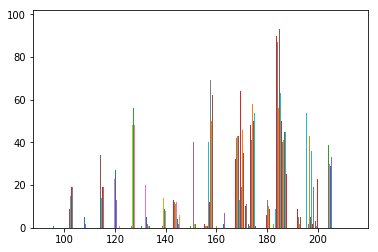

In [8]:
hist_data = avg_patch(patch_shape=(100,100), sample_count=2)
plt.hist(hist_data)
plt.show()

In [9]:
hist_data.mean()

167.0453

In [10]:
hist_data.var()

714.25404791000005

In [11]:
-(10000/2)*math.log(2*math.pi) - (10000/2)*math.log(hist_data.var()) - \
(1/2*hist_data.var())*np.sum(np.square(hist_data - hist_data.mean()))

-2550836270.3579774

### sample_count = 100

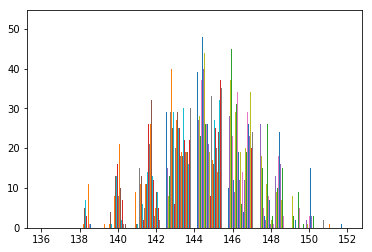

In [12]:
hist_data = avg_patch(patch_shape=(100,100), sample_count=100)
plt.hist(hist_data)
plt.show()

In [13]:
hist_data.mean()

144.64645400000001

In [14]:
hist_data.var()

5.4731743658839997

In [15]:
-(10000/2)*math.log(2*math.pi) - (10000/2)*math.log(hist_data.var()) - \
(1/2*hist_data.var())*np.sum(np.square(hist_data - hist_data.mean()))

-167466.86738360746

### sample_count = 1000

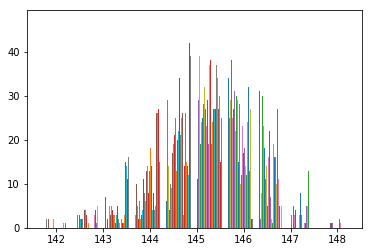

In [16]:
hist_data = avg_patch(patch_shape=(100,100), sample_count=1000)
plt.hist(hist_data)
plt.show()

In [17]:
hist_data.mean()

145.21534899999997

In [18]:
hist_data.var()

0.9150870185990001

In [19]:
-(10000/2)*math.log(2*math.pi) - (10000/2)*math.log(hist_data.var()) - \
(1/2*hist_data.var())*np.sum(np.square(hist_data - hist_data.mean()))

-12932.626010415945

The one with 1000 random smaples gives highest likelihood as it is more gaussian and our likelihood function is w.r.t to gaussian dist.

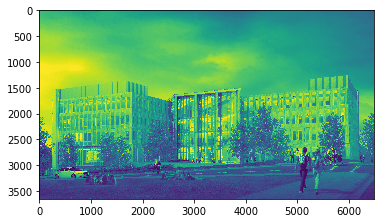

In [20]:
plt.imshow(random_patch((3654, 6495)))
plt.show()

### problem 3

In [21]:
def power_iteration(A):
    """
    Ideally choose a random vector to decrease the chance that our vector is orthogonal to eigen vector
    """
    b_k = np.random.rand(A.shape[0])
    num_simulations = 10000
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)
        # calculate its norm
        b_k1_norm = np.linalg.norm(b_k1)
        # renormalize the vector
        b_k = b_k1/b_k1_norm
    
    # rayleigh quotient in order to get the associated eigen value
    rayleigh_quotient = np.dot(b_k.T, np.dot(A, b_k))/np.dot(b_k.T,b_k)
    
    return np.reshape(b_k, (b_k.shape[0],1)), rayleigh_quotient

In [22]:
flute = loadmat('./data/flute.mat')['X'].T
flute.shape

(143, 128)

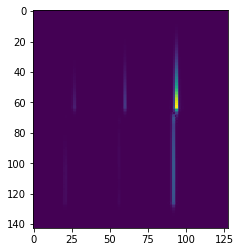

In [23]:
plt.imshow(flute)
plt.show()

### Finding eigen vectors

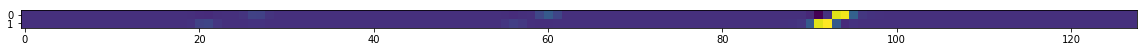

In [24]:
flute_cov = np.cov(flute.T)
eigen_vec1, eigen_val1 = power_iteration(flute_cov)

cov_residue = flute_cov - (eigen_val1)*np.dot(eigen_vec1, eigen_vec1.T)
eigen_vec2, eigen_val2 = power_iteration(cov_residue)

eigen_vecs = np.append(eigen_vec1, eigen_vec2, axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eigen_vecs.T)
plt.show()

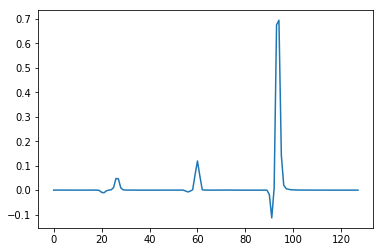

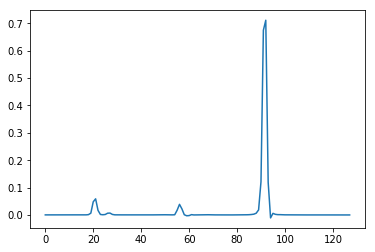

In [25]:
plt.plot(eigen_vec1)
plt.show()
plt.plot(eigen_vec2)
plt.show()

### constructing the new data by projecting the data on to the eigen vectors

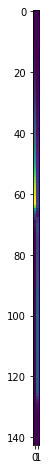

In [26]:
flute_newspace = np.dot(flute,eigen_vecs)
plt.figure(figsize=(8,8))
plt.imshow(flute_newspace)
plt.show()

### Reconstruting the original signal from the compressed data (data in the eigen space)

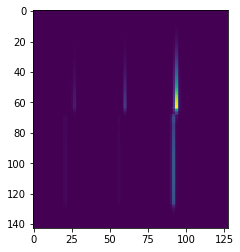

In [27]:
plt.imshow(np.dot(flute_newspace, eigen_vecs.T))
plt.show()

### Problem 4 BFGS

### clean image we use for target of the optimization

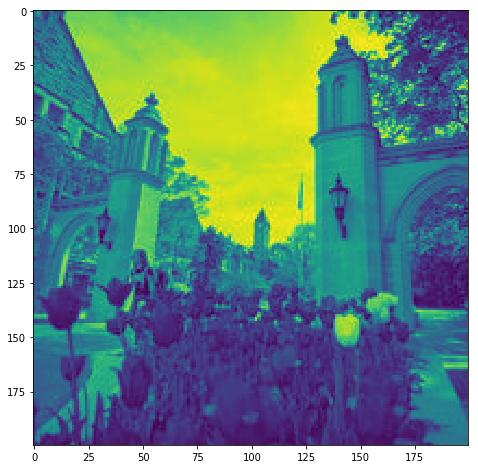

In [3]:
sg_train = mpimg.imread('./data/sg_train.jpg').astype('float')
plt.figure(figsize=(8,8))
plt.imshow(sg_train)
plt.show()

### Input noisy Image: input train data

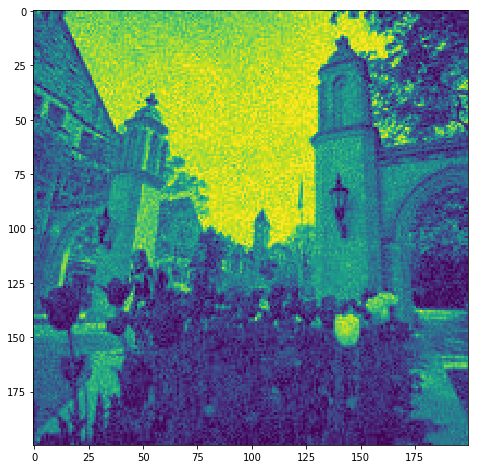

In [19]:
sgx_train = mpimg.imread('./data/sgx_train.jpg').astype('float')
plt.figure(figsize=(8,8))
plt.imshow(sgx_train)
plt.show()

### test input 

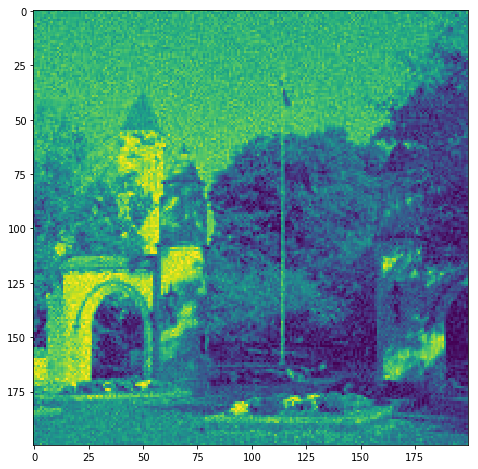

In [5]:
sgx_test = mpimg.imread('./data/sgx_test.jpg').astype('float')
plt.figure(figsize=(8,8))
plt.imshow(sgx_test)
plt.show()

In [6]:
print(sg_train.shape, sgx_train.shape, sgx_test.shape)

(200, 200) (200, 200) (200, 200)


### make data functions

In [7]:
def read_data():
    sg_train = mpimg.imread('./data/sg_train.jpg').astype('float')
    sgx_train = mpimg.imread('./data/sgx_train.jpg').astype('float')
    sgx_test = mpimg.imread('./data/sgx_test.jpg').astype('float')
    return sg_train, sgx_train, sgx_test


In [8]:
def make_xtrain(patch_shape):
    """
    make X_train: reshape the columns in the patch to ((rows*cols),1) and move the patch from top left to 
    bottom left 
                ---> ---> ---> .... |
                ---> ---> ---> .... |
                     :              |
                     :              | 
                                    V
    """
    sg_train, sgx_train, sgx_test = read_data()
    for y in range(sgx_train.shape[1] - patch_shape[1]+1):
        for x in range(sgx_train.shape[0] - patch_shape[0]+1):
            if y==0 and x==0:
                patch = sgx_train[0:patch_shape[0], 0:patch_shape[1]]
                X_train =  patch.reshape((1, patch_shape[0]*patch_shape[1]))
            else:
                patch = sgx_train[y:y+patch_shape[1], x:x+patch_shape[0]]
                patch_columnized = patch.reshape((1, patch_shape[0]*patch_shape[1]))
                X_train = np.append(X_train, patch_columnized, axis=0)
#             print(X_train)
    return X_train

def make_xtest(patch_shape):
    """
    The patch is multipiled with the filter to approximate the centeral pixel of the patch so here we are
    trying to create x_test data from the clean image which maps to the patches picked in x_train
    """
    sg_train, sgx_train, sgx_test = read_data()
    pixel_x, pixel_y = int(patch_shape[0]/2), int(patch_shape[1]/2)
    X_test = sg_train[pixel_y, pixel_x:(sg_train.shape[0]-pixel_x)]
#     print(pixel_x,(sg_train.shape[0]-pixel_x), pixel_y)
    for y in range(pixel_y+1, sg_train.shape[1]-pixel_y):
#         print(X_test)
        X_test = np.append(X_test, sg_train[y, pixel_x+1:(sg_train.shape[0]-pixel_x)+1])
    return X_test

def apply_filter(f, patch_shape):
    """
    """
    sg_train, sgx_train, sgx_test = read_data()
    pixel_x, pixel_y = int(patch_shape[0]/2), int(patch_shape[1]/2)
    denoised_image = sgx_train
    f_sum = np.sum(f)
#     denoised_image[pixel_x+1:sgx_train.shape[0]-pixel_x,pixel_y+1:sgx_train.shape[1]-pixel_y] = \
#         denoised_image[pixel_x+1:sgx_train.shape[0]-pixel_x,pixel_y+1:sgx_train.shape[1]-pixel_y]/255
    for y in range(pixel_y+1, sg_train.shape[1]-pixel_y):
        for x in range(pixel_x+1, sg_train.shape[0]-pixel_x):
#             print(x-(pixel_x+1),x+(pixel_x), y-(pixel_y+1),y+(pixel_y))
            patch = sgx_train[y-(pixel_y+1):y+(pixel_y), x-(pixel_x+1):x+(pixel_x)]
#             print(patch)
#             print(patch.reshape((1, patch_shape[0]*patch_shape[1])))
#             print(np.dot(patch.reshape((1, patch_shape[0]*patch_shape[1])), f)/f_sum)
            denoised_image[y, x] = np.dot(patch.reshape((1, patch_shape[0]*patch_shape[1])), f)/f_sum

    return denoised_image.astype('int')    

In [9]:
sg_train

array([[ 105.,   95.,  145., ...,   15.,   13.,   17.],
       [  90.,  110.,  152., ...,   20.,   15.,   16.],
       [  98.,   89.,  122., ...,   21.,   19.,   19.],
       ..., 
       [  41.,   93.,  114., ...,   99.,   99.,   99.],
       [  33.,   57.,   79., ...,  100.,  100.,  100.],
       [  32.,   21.,   38., ...,  101.,  101.,  102.]])

In [10]:
sg_train[0:3,0:3]

array([[ 105.,   95.,  145.],
       [  90.,  110.,  152.],
       [  98.,   89.,  122.]])

In [11]:
make_xtest((3,3))

array([ 110.,  152.,  104., ...,  100.,  100.,  100.])

### learners

1. gradient descent method

In [80]:
def logistic_function(x):
    return 1.0/(1.0+np.exp(-x))
def dlogitic_function(x):
    logistic = logistic_function(x)
    return (logistic * (1 - logistic))
def lineear_function(x):
    return x
def dlinear_function(x):
    return 1

# v_logistic_function = np.vectorize(logistic_function)
# v_first_derivative_logitic_function = np.vectorize(first_derivative_logitic_function)

def gradient_descent(X_train, X_test, f, eeta, momentum, method="logistic", iterations=10000):
    """
    both train and test should be divide by 255 to squish the values between [0,1].
    minimize the sq error function. 
    """
    X_test = np.divide(X_test,255)
    error_list = []
    for iteration in range(iterations):
        if method=="logistic":
            X = np.dot(X_train, f)/9
#             print(X)
            fun_X = logistic_function(X)
            d_fun_X = dlogitic_function(X)
        elif method=="linear":
            X = np.dot(X_train, f)
            fun_X = X
            d_fun_X = 1
#         print(fun_X)
        error = X_test - fun_X
        gradient = -(2/X_train.shape[1]) * np.dot(X_train.T, (error * d_fun_X))
        f = f - (eeta * gradient)
#         if iteration%5000 == 0:
# #             print("Error:", np.dot(error,error.T))
# #             print(error)
# #             print(gradient)
# #         error_list.append(np.sum(np.square(error)))
    return f, error_list

In [84]:
patch_shape = (7,7)
X_train = make_xtrain(patch_shape)
X_test = make_xtest(patch_shape)
print(X_train.shape, X_test.shape)

(37636, 49) (37636,)


In [85]:
f = np.random.randn(patch_shape[0]*patch_shape[1])
# print(f)
f_, error_list = gradient_descent(X_train, X_test, f, 0.01, 1, "logistic", 10000)
# print(f_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


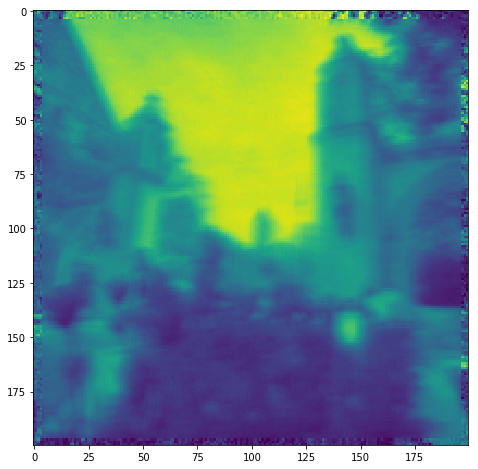

In [86]:
# Image reconstruction
denoised_image = apply_filter(f_, patch_shape)
plt.figure(figsize=(8,8))
plt.imshow(denoised_image)
plt.show()

In [59]:
def train(patch_shape, method):
    
    patch_shape = (7, 7)
    X_train = make_xtrain(patch_shape)
    X_test = make_xtest(patch_shape)
    f = np.random.randn(patch_shape[0]*patch_shape[1])
    # filter learning: reconstruct the signal X_test from X_train : X_test <- X_train.f 
    #  and in the process learn f
    if method=="gradient_descent":
        f_, error_list = gradient_descent(X_train, X_test, f, 0.01, 1, "logistic", 10000)
    elif method=="bfgs":
        f, error_list = bfgs(X_test, X_train, f, 0.01)
        
    # Image reconstruction
    denoised_image = apply_filter(f_, patch_shape)
    plt.figure(figsize=(8,8))
    plt.imshow(denoised_image)
    plt.show()
    
    return 0
    

train((15,15), method="gradient_descent")

ValueError: cannot reshape array of size 196 into shape (225,1)

In [404]:
np.around(f_.reshape(15,15), decimals=2)

array([[ 0.33,  0.08,  0.51, -0.06, -0.09,  0.17,  0.5 ,  0.33,  0.54,
         0.58,  0.85,  0.54,  0.72,  0.88,  0.81],
       [ 0.33,  0.2 ,  0.73,  0.42,  0.75,  0.03,  0.29, -0.07,  0.25,
         0.57,  0.79,  0.03,  0.02,  0.46, -0.07],
       [ 0.65, -0.09, -0.1 ,  0.64,  0.26,  0.65,  0.56,  0.23, -0.09,
         0.76,  0.61,  0.84,  0.56,  0.14,  0.37],
       [ 0.61,  0.61, -0.04,  0.03,  0.78,  0.51,  0.35,  0.03,  0.08,
         0.44,  0.84,  0.67, -0.01,  0.37,  0.73],
       [ 0.48,  0.71,  0.53,  0.39,  0.81,  0.07, -0.04,  0.4 ,  0.02,
        -0.1 ,  0.34,  0.74,  0.03,  0.76,  0.61],
       [ 0.47,  0.7 ,  0.61,  0.56, -0.1 ,  0.87,  0.07,  0.85,  0.01,
         0.28,  0.39,  0.87,  0.48,  0.42,  0.48],
       [ 0.49,  0.31,  0.86,  0.79,  0.63,  0.17,  0.25,  0.46,  0.48,
         0.71,  0.54,  0.77,  0.53,  0.13,  0.01],
       [ 0.85,  0.36,  0.68,  0.01,  0.67,  0.74,  0.54,  0.2 ,  0.51,
         0.19,  0.4 ,  0.11,  0.55,  0.44,  0.72],
       [ 0.75,  0.33,  0

In [638]:
pixel_x, pixel_y = int(patch_shape[0]/2), int(patch_shape[1]/2)
X_train = make_train(patch_shape)
X_test = make_test(patch_shape)
f = np.random.rand(patch_shape[0]*patch_shape[1])
f = gradient_descent(X_test, X_train, f, 0.1)

In [652]:
def apply_filter(f, patch_shape):
    """
    """
    pixel_x, pixel_y = int(patch_shape[0]/2), int(patch_shape[1]/2)
    denoised_image = sgx_train
    for y in range(pixel_y+1, sg_train.shape[1]-pixel_y):
        for x in range(pixel_x+1, sg_train.shape[0]-pixel_x):
            patch = sgx_train[x-(pixel_x+1):x+(pixel_x-1), y-(pixel_y+1):y+(pixel_y-1)]
#             print(patch)
#             print(patch.reshape((patch_shape[0]*patch_shape[1],1)).T)
#             print(np.dot(patch.reshape((patch_shape[0]*patch_shape[1],1)).T, f))
#             if np.dot(patch.reshape((patch_shape[0]*patch_shape[1],1)).T, f) > 500:
            denoised_image[x,y] = np.dot(patch.reshape((patch_shape[0]*patch_shape[1],1)).T, f)/np.sum(f)

    return denoised_image.astype('int')

denoised_image = apply_filter(f, (6,6))
denoised_image.shape

ValueError: shapes (1,36) and (100,) not aligned: 36 (dim 1) != 100 (dim 0)

In [618]:
f1

array([  3.92815454e-03,   1.01699262e-02,   1.53965661e-02,
         1.09580794e-02,   1.25517923e-02,   7.53535809e-03,
         1.77001280e-02,   8.31873964e-03,   1.43391119e-02,
         5.66684740e-04,   1.78297101e-02,   1.41987599e-02,
         7.65577349e-03,   1.69871111e-02,   1.07922583e-02,
         2.34026763e-03,   5.17103618e-03,   1.88540795e-02,
         4.04350079e-03,   3.85690343e-03,   6.21158601e-04,
         1.83951053e-02,   5.06049808e-03,   9.16263188e-04,
         9.24458020e-04,   1.80481894e-02,   1.95583488e-02,
         1.11241067e-02,   1.32086118e-02,   1.74533940e-02,
         1.16392470e-02,   1.55928181e-03,   7.03789122e-03,
         1.07126322e-02,   3.86408868e-03,   1.74271835e-02,
         1.53817363e-02,   3.85236823e-03,   6.86879698e-03,
         1.50097670e-02,   1.14271981e-02,   1.41560176e-02,
         8.83636485e-03,   1.27255757e-03,   2.92709162e-03,
         5.77065040e-03,   1.42551548e-02,   1.95004448e-02,
         8.76150733e-03,

In [680]:
denoised_image[100,0:]

array([37, 58,  7, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  4,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 92])

In [640]:
sgx_train[15,0:]

array([  42.,   39.,   73.,   82.,  111.,  129.,  127.,   65.,  114.,
        105.,   56.,  111.,  117.,  103.,  101.,  104.,   86.,   79.,
         39.,  135.,  218.,  206.,  182.,  220.,  208.,  209.,  219.,
        203.,  221.,  219.,  221.,  204.,  222.,  227.,  192.,  234.,
        208.,  216.,  219.,  237.,  215.,  191.,  212.,  195.,  231.,
        207.,  215.,  230.,  209.,  208.,  219.,  210.,  221.,  216.,
        232.,  235.,  209.,  201.,  208.,  224.,  203.,  219.,  210.,
        226.,  219.,  230.,  227.,  198.,  228.,  202.,  234.,  214.,
        214.,  218.,  214.,  202.,  200.,  211.,  220.,  220.,  209.,
        209.,  201.,  211.,  213.,  223.,  198.,  228.,  211.,  185.,
        211.,  196.,  243.,  229.,  225.,  202.,  199.,  223.,  211.,
        193.,  213.,  234.,  226.,  215.,  205.,  238.,  231.,  232.,
        209.,  218.,  223.,  217.,  244.,  229.,  211.,  208.,  222.,
        220.,  219.,  228.,  242.,  232.,  225.,  228.,  231.,  231.,
        231.,  233.,

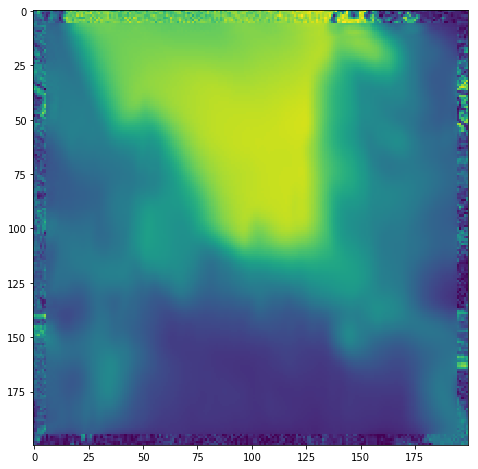

In [651]:
# sgx_test = mpimg.imread('./data/sgx_test.jpg').astype('float')
plt.figure(figsize=(8,8))
# plt.imshow(X_test)
plt.imshow(denoised_image)
plt.show()

In [624]:
denoised_image[10,0:]

array([                  84,                  108,                   96,
                         93,                  113,                  119,
                       1055,                -4519,                24572,
                    -129146,               698781,             -3893746,
                   21913172,           -124073374,            707915828,
                -4067407321,          23500925660,        -136407722164,
               794836249009,       -4647025086533,       27248448142787,
           -160181491378461,      943720822518506,    -5570746988891381,
          32939552929992408,  -195058943029943456,  1156587685103972608,
       -6865713422990218240, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, 

In [505]:
a = np.arange(6).reshape((3, 2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [507]:
a.reshape((1,a.shape[0]*a.shape[1])).reshape((a.shape[0],a.shape[1]))

array([[0, 1],
       [2, 3],
       [4, 5]])